# Descriptive metadata overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("../cwts_covid/datasets_input/CORD19_2020_03_28/metadata.csv")

In [3]:
df_meta.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [4]:
len("aecbc613ebdab36753235197ffb4f35734b5ca63")

40

In [5]:
df_meta.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file', 'url'],
      dtype='object')

In [6]:
df_meta["Microsoft Academic Paper ID"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
45769             NaN
45770             NaN
45771             NaN
45772    1.953688e+09
45773             NaN
Name: Microsoft Academic Paper ID, Length: 45774, dtype: float64

#### Publication years

In [7]:
import re

def get_year(s):
    if pd.isna(s):
        return np.nan
    return re.search(r"(\d{4})", s).group(1)

df_meta["year"] = df_meta["publish_time"].apply(get_year)

In [8]:
df_meta.year.describe()

count     45765
unique       65
top        2020
freq       3590
Name: year, dtype: object

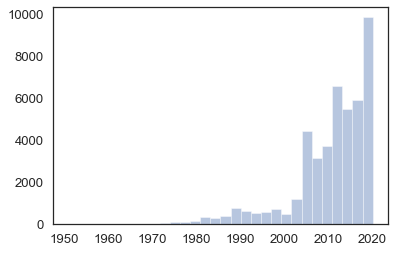

In [9]:
sns.distplot(df_meta.year.tolist(), bins=30, kde=False)

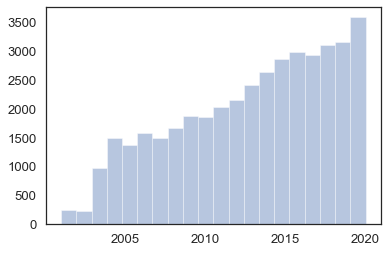

In [10]:
sns.distplot(df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")].year.tolist(), bins=20, hist=True, kde=False)

#### Null values

In [11]:
df_meta.shape

(45774, 18)

In [12]:
sum(pd.notnull(df_meta.abstract))

37913

In [13]:
sum(pd.notnull(df_meta.doi))

42440

In [14]:
sum(pd.notnull(df_meta.pmcid))

26243

In [15]:
sum(pd.notnull(df_meta.pubmed_id))

34641

In [16]:
sum(pd.notnull(df_meta.journal))

41707

In [17]:
sum(pd.notnull(df_meta.has_full_text))

45774

#### Journals

In [18]:
df_meta.journal.value_counts()[:30]

Journal of Virology                                    1740
PLoS One                                               1567
Virology                                                865
Emerg Infect Dis                                        749
The Lancet                                              597
Viruses                                                 569
Arch Virol                                              504
Virus Research                                          495
Sci Rep                                                 491
Vaccine                                                 484
Veterinary Microbiology                                 443
Journal of Virological Methods                          393
Journal of Clinical Virology                            378
PLoS Pathog                                             361
Virol J                                                 357
Antiviral Research                                      348
The Lancet Infectious Diseases          

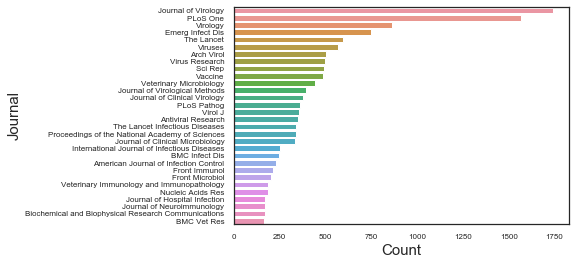

In [19]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=8)

#### Sources and licenses

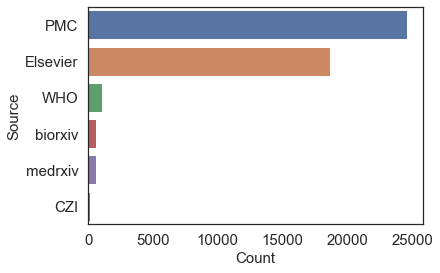

In [20]:
# source
df_sub = df_meta[df_meta.source_x.isin(df_meta.source_x.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source_x", data=df_sub, order=df_sub['source_x'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

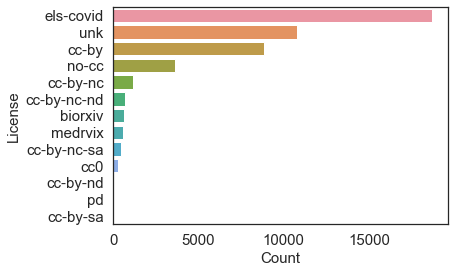

In [21]:
# license
df_sub = df_meta[df_meta.license.isin(df_meta.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

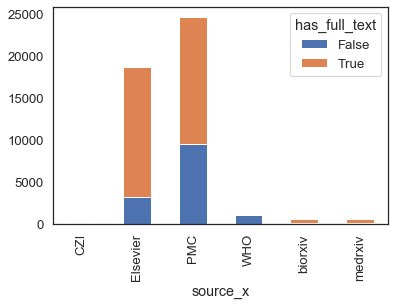

In [22]:
# full text x source
df_plot = df_meta.groupby(['has_full_text', 'source_x']).size().reset_index().pivot(columns='has_full_text', index='source_x', values=0)
df_plot.plot(kind='bar', stacked=True)

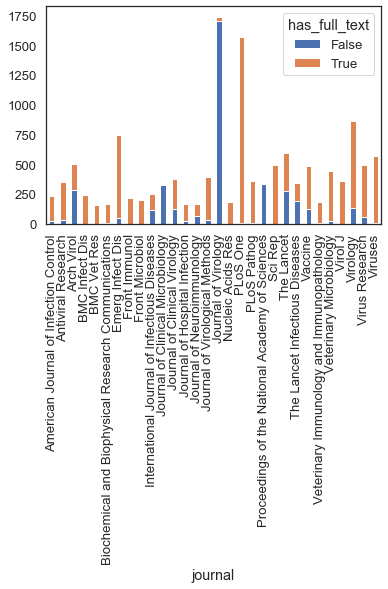

In [23]:
# full text x journal
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

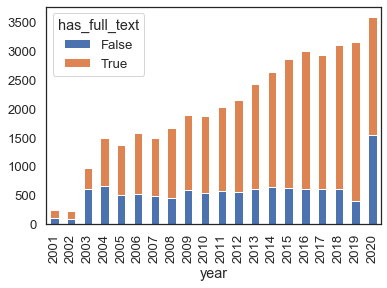

In [24]:
# full text x year
df_sub = df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")]
df_plot = df_sub.groupby(['has_full_text', 'year']).size().reset_index().pivot(columns='has_full_text', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)

### Coverage wrt Dimensions and WHO

This is still problematically low..

In [26]:
# datasets

who_latest = "../cwts_covid/datasets_input/WHO_28_03_2020.csv"
dimensions_latest = "../cwts_covid/datasets_input/Dimensions_28_03_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [27]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [28]:
cord_dois = df_meta[pd.notnull(df_meta["doi"])]["doi"].tolist()

In [29]:
len(cord_dois)

42440

In [30]:
len(set(cord_dois).intersection(set(who_dois)))/len(set(who_dois))

0.4323866044934294

In [31]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.5924657534246576

## Abstracts

In [32]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[0]

'Next-generation sequencing is increasingly being used to study samples composed of mixtures of organisms, such as in clinical applications where the presence of a pathogen at very low abundance may be highly important. We present an analytical method (SIANN: Strain Identification by Alignment to Near Neighbors) specifically designed to rapidly detect a set of target organisms in mixed samples that achieves a high degree of species- and strain-specificity by aligning short sequence reads to the genomes of near neighbor organisms, as well as that of the target. Empirical benchmarking alongside the current state-of-the-art methods shows an extremely high Positive Predictive Value, even at very low abundances of the target organism in a mixed sample. SIANN is available as an Illumina BaseSpace app, as well as through Signature Science, LLC. SIANN results are presented in a streamlined report designed to be comprehensible to the non-specialist user, providing a powerful tool for rapid spec

#### Topic modelling

In [33]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [31]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [34]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [35]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

CPU times: user 1h 26min 18s, sys: 7min 1s, total: 1h 33min 20s
Wall time: 24min 14s


In [36]:
import pickle

pickle.dump(processed_docs, open("working_folder/processed_docs.pk", "wb"))

In [50]:
import pickle

processed_docs = pickle.load(open("working_folder/processed_docs.pk", "rb"))

In [37]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [38]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 10

In [39]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 14199
Number of docs: 37913 (37913)


In [40]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 15,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 1min 21s, sys: 820 ms, total: 1min 22s
Wall time: 1min 20s


In [41]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.051*"cell" + 0.023*"infection" + 0.017*"response" + 0.015*"mouse" + 0.013*"immune"'),
 (1,
  '0.029*"case" + 0.015*"risk" + 0.015*"infection" + 0.014*"outbreak" + 0.012*"china"'),
 (2,
  '0.069*"protein" + 0.020*"cell" + 0.017*"membrane" + 0.012*"domain" + 0.011*"fusion"'),
 (3,
  '0.049*"virus" + 0.022*"infection" + 0.022*"respiratory" + 0.018*"sample" + 0.017*"calf"'),
 (4,
  '0.024*"model" + 0.016*"-PRON-" + 0.015*"datum" + 0.011*"disease" + 0.010*"method"'),
 (5,
  '0.052*"patient" + 0.025*"respiratory" + 0.025*"infection" + 0.017*"child" + 0.011*"influenza"'),
 (6,
  '0.035*"health" + 0.016*"disease" + 0.014*"public" + 0.010*"care" + 0.010*"public_health"'),
 (7,
  '0.030*"virus" + 0.023*"vaccine" + 0.019*"disease" + 0.018*"human" + 0.013*"pathogen"'),
 (8,
  '0.026*"disease" + 0.019*"lung" + 0.012*"patient" + 0.012*"clinical" + 0.011*"treatment"'),
 (9,
  '0.057*"antibody" + 0.022*"cat" + 0.017*"antigen" + 0.015*"specific" + 0.014*"vaccine"'),
 (10,
  '0.094*"sars" + 0.

In [42]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [43]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [44]:
topics[0,:]

array([0.        , 0.        , 0.        , 0.07169352, 0.25046185,
       0.        , 0.        , 0.23160066, 0.        , 0.        ,
       0.        , 0.06135464, 0.        , 0.37865239, 0.        ])

In [45]:
model.get_document_topics(corpus[0])

[(3, 0.071693085),
 (4, 0.2504554),
 (7, 0.23160723),
 (11, 0.061368283),
 (13, 0.37863904)]

In [46]:
df_topics = pd.DataFrame(topics)

In [47]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [48]:
from_which_year = "2000"

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

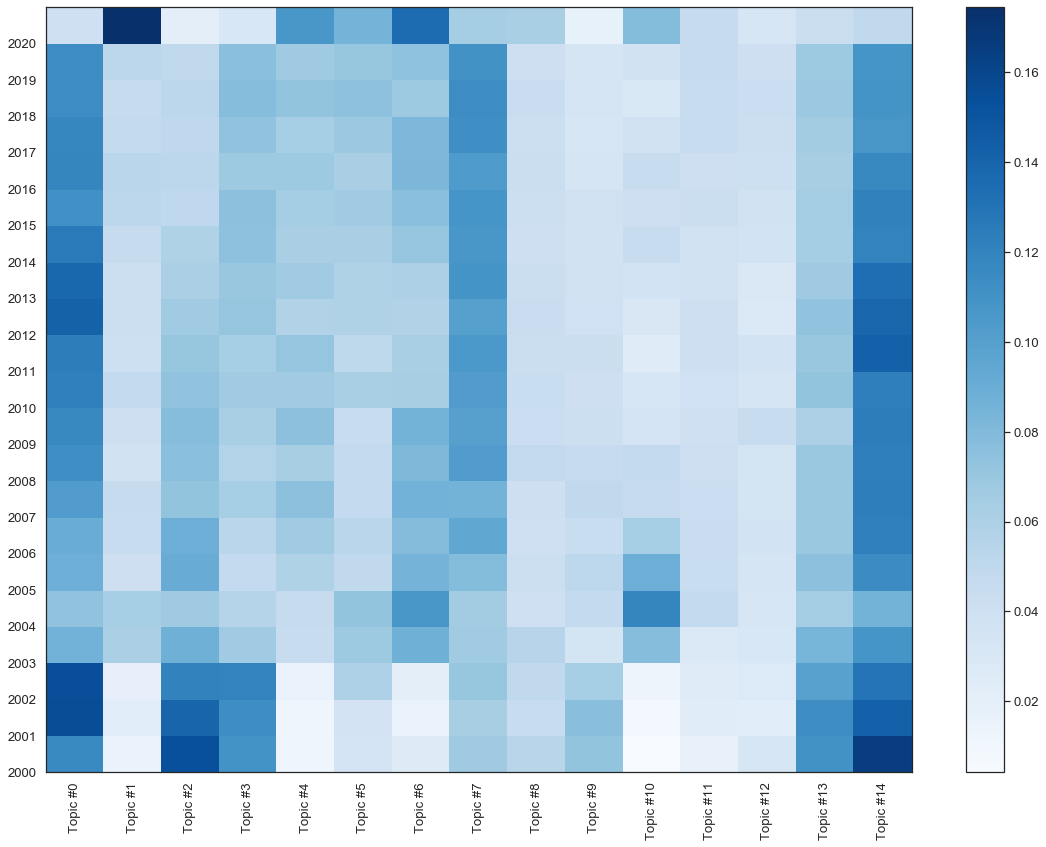

In [49]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

#### Language modelling

In [50]:
from gensim.models import Word2Vec
import pickle

processed_docs = pickle.load(open("working_folder/processed_docs.pk", "rb"))

model = Word2Vec(processed_docs, size=256, window=10, min_count=2, workers=6)

In [51]:
model.wv.most_similar("coronavirus")

[('covs', 0.6351536512374878),
 ('hcov', 0.5260764956474304),
 ('betacoronavirus', 0.5233484506607056),
 ('cov', 0.5210314989089966),
 ('coronaviruses', 0.510586678981781),
 ('hcovs', 0.4648493528366089),
 ('coronaviru', 0.45522400736808777),
 ('alphacoronavirus', 0.45182859897613525),
 ('bcov', 0.44180911779403687),
 ('virus', 0.43348371982574463)]

#### Keyword extraction

Using [RAKE](https://csurfer.github.io/rake-nltk/_build/html/index.html)

In [52]:
from rake_nltk import Rake

# Uses stopwords for English from NLTK, and all puntuation characters by default
r = Rake(min_length=2)

# Extraction given the text
r.extract_keywords_from_text(abstracts[0])

In [53]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()[:10]

['extremely high positive predictive value',
 'aligning short sequence reads',
 'delivering highly accurate results',
 'rapid species detection',
 'illumina basespace app',
 'empirical benchmarking alongside',
 'art methods shows',
 'low computational requirements',
 'low abundance may',
 'study samples composed']

In [54]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:10]

[(23.5, 'extremely high positive predictive value'),
 (16.0, 'aligning short sequence reads'),
 (14.0, 'delivering highly accurate results'),
 (9.0, 'rapid species detection'),
 (9.0, 'illumina basespace app'),
 (9.0, 'empirical benchmarking alongside'),
 (9.0, 'art methods shows'),
 (8.666666666666666, 'low computational requirements'),
 (8.666666666666666, 'low abundance may'),
 (8.5, 'study samples composed')]

In [55]:
len(processed_docs)

37913

In [56]:
r = Rake(min_length=2, max_length=3)
# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences([" ".join(d) for d in processed_docs])

In [57]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:50]

[(9.0, 'welcome adam vaughan'),
 (9.0, 'wash hand thoroughly'),
 (9.0, 'understand pandemic datum'),
 (9.0, 'trypsin cod trypsin'),
 (9.0, 'trichothecene mycotoxin deoxynivalenol'),
 (9.0, 'tolerance self rna'),
 (9.0, 'summarize presentation discussion'),
 (9.0, 'suffer cold addition'),
 (9.0, 'substitute mask alternative'),
 (9.0, 'strategy widely applicable'),
 (9.0, 'start codon suggest'),
 (9.0, 'set richard smyth'),
 (9.0, 'remain committed neurorehabilitation'),
 (9.0, 'new york dutton'),
 (9.0, 'method general interest'),
 (9.0, 'measure cleavage angiotensin'),
 (9.0, 'knowledge sars high'),
 (9.0, 'join faculty worker'),
 (9.0, 'influence hbv transcription'),
 (9.0, 'individual different value'),
 (9.0, 'illustrate application pandemic'),
 (9.0, 'haq posthoc conclusion'),
 (9.0, 'febrile tachypneic hypoxic'),
 (9.0, 'explore hypothesis conserved'),
 (9.0, 'expect effort different'),
 (9.0, 'expand initial cohort'),
 (9.0, 'envoy ming emperor'),
 (9.0, 'endoplasmic reticulum gl